In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv('financial_regression.csv')

# Display the first few rows to understand the structure
print(df.head())

         date  sp500 open  sp500 high  sp500 low  sp500 close  sp500 volume  \
0  2010-01-14      114.49      115.14     114.42       114.93   115646960.0   
1  2010-01-15      114.73      114.84     113.20       113.64   212252769.0   
2  2010-01-18         NaN         NaN        NaN          NaN           NaN   
3  2010-01-19      113.62      115.13     113.59       115.06   138671890.0   
4  2010-01-20      114.28      114.45     112.98       113.89   216330645.0   

   sp500 high-low  nasdaq open  nasdaq high  nasdaq low  ...  palladium high  \
0            0.72        46.26       46.520       46.22  ...           45.02   
1            1.64        46.46       46.550       45.65  ...           45.76   
2             NaN          NaN          NaN         NaN  ...             NaN   
3            1.54        45.96       46.640       45.95  ...           47.08   
4            1.47        46.27       46.604       45.43  ...           47.31   

   palladium low  palladium close  palladium

In [6]:
df.columns

Index(['date', 'sp500 open', 'sp500 high', 'sp500 low', 'sp500 close',
       'sp500 volume', 'sp500 high-low', 'nasdaq open', 'nasdaq high',
       'nasdaq low', 'nasdaq close', 'nasdaq volume', 'nasdaq high-low',
       'us_rates_%', 'CPI', 'usd_chf', 'eur_usd', 'GDP', 'silver open',
       'silver high', 'silver low', 'silver close', 'silver volume',
       'silver high-low', 'oil open', 'oil high', 'oil low', 'oil close',
       'oil volume', 'oil high-low', 'platinum open', 'platinum high',
       'platinum low', 'platinum close', 'platinum volume',
       'platinum high-low', 'palladium open', 'palladium high',
       'palladium low', 'palladium close', 'palladium volume',
       'palladium high-low', 'gold open', 'gold high', 'gold low',
       'gold close', 'gold volume'],
      dtype='object')

In [7]:
# Drop unnecessary columns
columns_to_keep = ['date', 'sp500 close', 'nasdaq close', 'usd_chf', 'gold open', 'gold high', 'gold low', 'gold close']
df = df[columns_to_keep]

# Handle missing values (drop rows or impute values)
df.dropna(inplace=True)

# Convert 'date' to datetime (if needed)
df['date'] = pd.to_datetime(df['date'])

# Set target variable
target = 'gold close'

print(df.head())

        date  sp500 close  nasdaq close  usd_chf  gold open  gold high  \
0 2010-01-14       114.93         46.39   1.0206     111.51     112.37   
1 2010-01-15       113.64         45.85   1.0264     111.35     112.01   
3 2010-01-19       115.06         46.59   1.0340     110.95     111.75   
4 2010-01-20       113.89         45.92   1.0453     109.97     110.05   
5 2010-01-21       111.70         45.49   1.0426     108.48     108.78   

   gold low  gold close  
0    110.79      112.03  
1    110.38      110.86  
3    110.83      111.52  
4    108.46      108.94  
5    106.61      107.37  


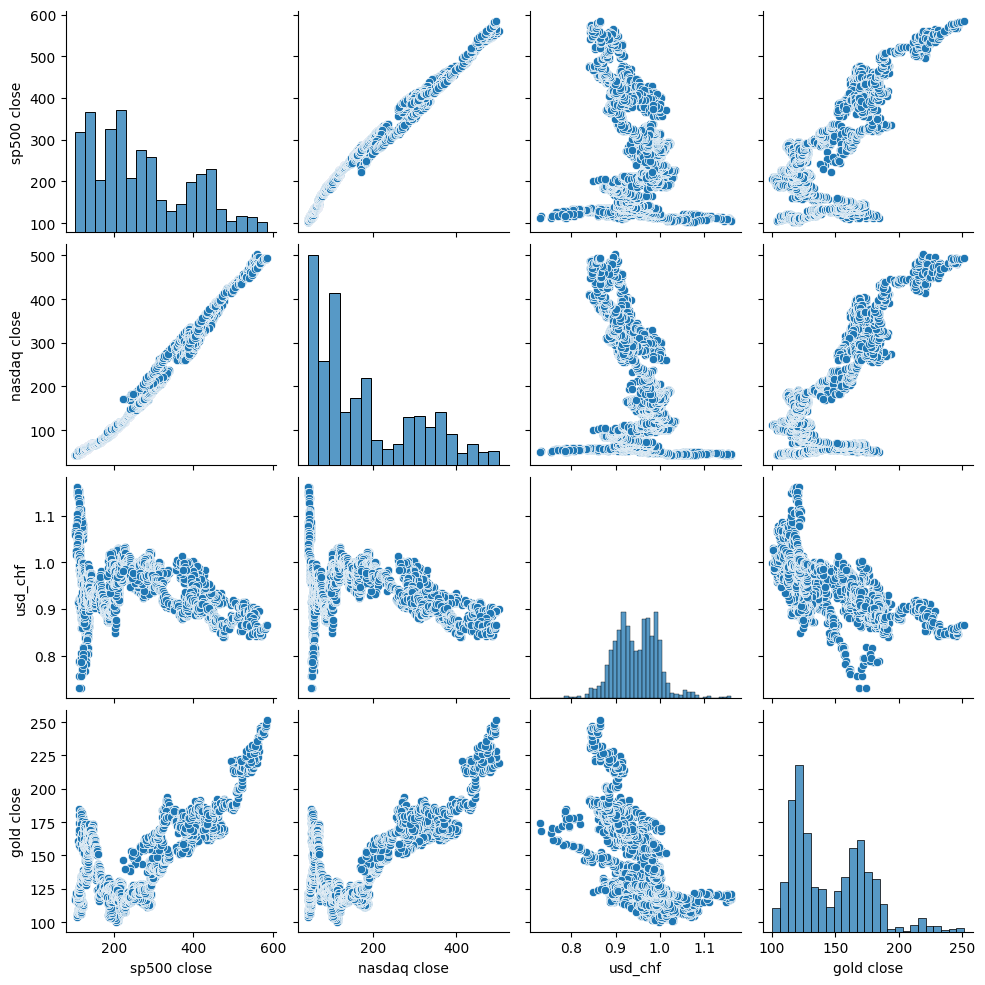

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot to explore relationships
sns.pairplot(df, vars=['sp500 close', 'nasdaq close', 'usd_chf', 'gold close'])
plt.show()


Financial market analysis reveals strong correlation between SP500 and NASDAQ indices, while USD/CHF shows declining trend with volatility. Gold prices display distinct price clusters, suggesting complex market dynamics and non-linear relationships between assets. Histogram distributions indicate non-normal patterns across variables, highlighting the interconnected yet complex nature of these financial instruments. CopyRetry

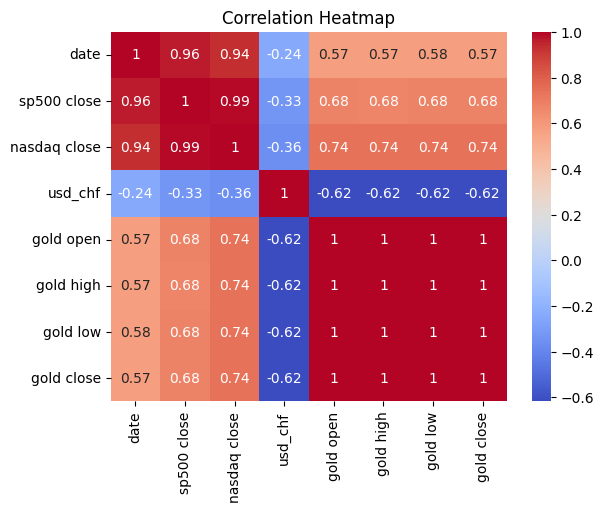

In [13]:
# Correlation heatmap
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

The correlation heatmap reveals strong positive correlations (0.99) between SP500 and NASDAQ indices, and perfect correlation (1.0) among gold metrics (open, high, low, close). USD/CHF shows negative correlations with both stock indices (-0.33 to -0.36) and gold (-0.62), indicating its inverse relationship with these assets. Stock indices demonstrate moderate positive correlation with gold (0.68-0.74), suggesting partial market alignment.

In [9]:

# Define features (X) and target (y)
X = df[['sp500 close', 'nasdaq close', 'gold open', 'gold high', 'gold low']]  # Independent variables
y = df['gold close']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [10]:
# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)


Mean Squared Error (MSE): 0.14401665689753781
R-squared (R²): 0.9998507756673972


#### Mean Squared Error (MSE): 0.144
The MSE is relatively low, indicating that the model's predictions are quite close to the actual values. In general, the lower the MSE, the better the model's predictions.

#### R-squared (R²): 0.9999
An R² value close to 1 indicates that the model explains almost all the variability in the data. In this case, the model is performing excellently, capturing 99.99% of the variance in the target variable.

Both metrics suggest a very good model fit.

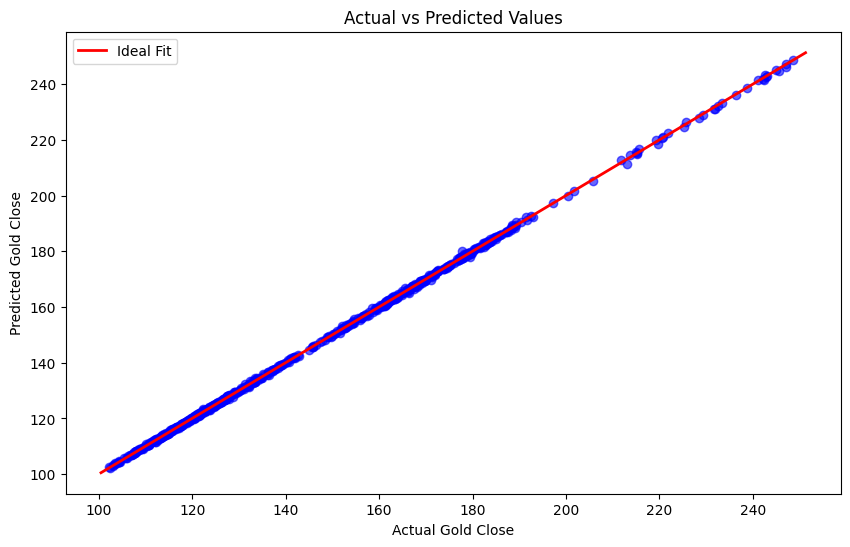

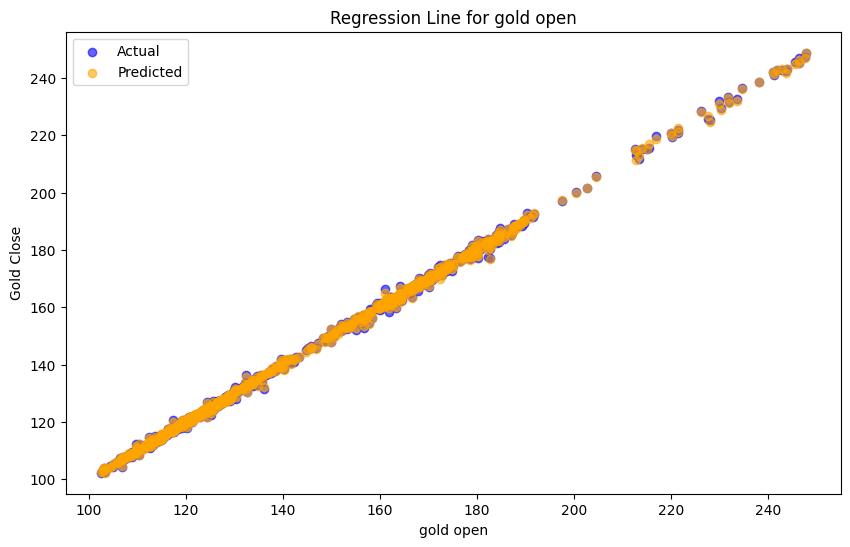

In [11]:
# Visualize actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linewidth=2, label='Ideal Fit')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Gold Close')
plt.ylabel('Predicted Gold Close')
plt.legend()
plt.show()

# Visualize regression line (using only one feature for simplicity)
single_feature = 'gold open'  # Change to any one feature for line visualization
plt.figure(figsize=(10, 6))
plt.scatter(X_test[single_feature], y_test, color='blue', alpha=0.6, label='Actual')
plt.scatter(X_test[single_feature], y_pred, color='orange', alpha=0.6, label='Predicted')
plt.title(f'Regression Line for {single_feature}')
plt.xlabel(single_feature)
plt.ylabel('Gold Close')
plt.legend()
plt.show()


#### Gold Price Prediction Model Analysis

Strong linear correlation between predicted and actual values, with points closely following ideal fit line. Model shows high prediction accuracy across entire price range (100-240) with minimal scatter and no systematic errors. Small residuals indicate reliable forecasting performance.

Model maintains consistent accuracy throughout all price levels. Overall, results demonstrate excellent predictive capability.